<a href="https://colab.research.google.com/github/EddieOrmseth/MAT-421/blob/main/Module%20H/Part%202/ModuleH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Numerical Error and Instability

Numerical Error can come from two main places: methods that approximate and numerican error stemming from the fact that computers can't perfectly represent real numbers.

Methods like Riemann Integrals do not exactly represent the integral of the function, they are good approximations but that's it, there is always some error. Even Taylor Series cannot represent a function exactly, and higher-order terms are often ignored.


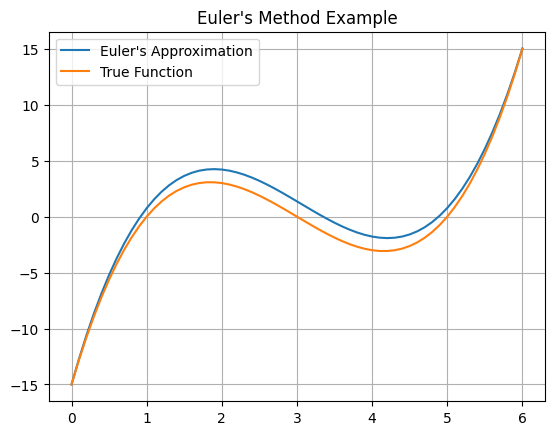

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def eulers_method(f, x0, y0, h, x_end): # method to evaluate funtion used euler's method
    x_values = np.arange(x0, x_end + h, h) # make all the x values
    y_values = np.zeros(len(x_values)) # start with zeros
    y_values[0] = y0 # initial value

    for i in range(1, len(x_values)): # iteratively compute the next y value
        y_values[i] = y_values[i - 1] + h * f(x_values[i - 1])

    return x_values, y_values


if __name__ == '__main__':
        # (x-1)(x-3)(x-5)
    f = lambda x: x**3 - 9*x**2 + 23*x - 15
    df_dx = lambda x: 3*x**2 - 18*x + 23

    x0 = 0
    y0 = f(x0)
    h = 0.1
    x_end = 6
    x_vals, y_est_vals = eulers_method(df_dx, x0, y0, h, x_end) # grab x and y values

    y_real_vals = [f(x) for x in x_vals]

    # plot the rest of the data
    plt.plot(x_vals, y_est_vals, label="Euler's Approximation") # Plot the solution
    plt.plot(x_vals, y_real_vals, label="True Function") # Plot the solution
    plt.title("Euler's Method Example")
    plt.legend()
    plt.grid()
    plt.show()



Predictor-Corrector Methods

These methods are systems that use one approximation method for an initial estimate, and then use a more accurate method to correct the first prediction value.

For instance, Heun's Method:

1. Predictor Method: Euler's Method

2. Correct using average of slopes

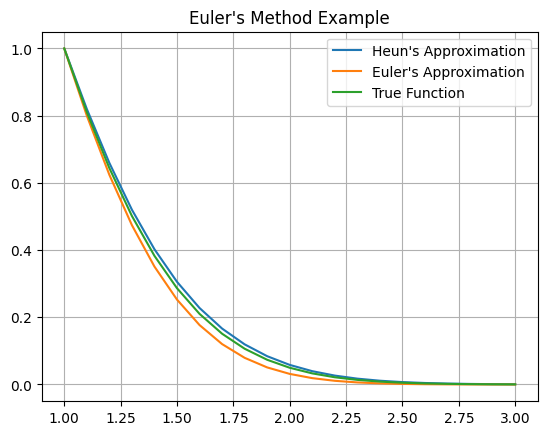

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt


def EulersMethod(f, x0, y0, x_end, h): # method to evaluate funtion used euler's method
    x_values = np.arange(x0, x_end + h, h) # make all the x values
    y_values = np.zeros(len(x_values)) # start with zeros
    y_values[0] = y0 # initial value

    for i in range(1, len(x_values)): # iteratively compute the next y value
        y_values[i] = y_values[i - 1] + h * f(x_values[i - 1], y_values[i - 1])

    return x_values, y_values


def HeunsMethod(f, x0, y0, x_end, h):
    x_values = np.arange(x0, x_end + h, h)
    y_values = np.zeros(len(x_values))
    y_values[0] = y0

    for i in range(1, len(x_values)):
        y_intermediate = y_values[i - 1] + h * f(x_values[i - 1], y_values[i - 1])
        y_values[i] = y_values[i - 1] + (h/2.0) * (f(x_values[i - 1], y_values[i - 1]) + f(x_values[i - 1], y_intermediate))

    return x_values, y_values


if __name__ == '__main__':

    x0 = 1
    x_end = 3
    y0 = 1
    h = 0.1

    dy_dx = lambda x, y: -2 * x * y
    C = y0 / math.exp(-x0**2)
    y = lambda x: C * math.exp(-x**2)

    x_vals, heuns_est_y_vals = HeunsMethod(dy_dx, x0, y0, x_end, h)
    _, eulers_est_y_vals = EulersMethod(dy_dx, x0, y0, x_end, h)
    real_y_vals = [y(x) for x in x_vals]

    # plot the rest of the data
    plt.plot(x_vals, heuns_est_y_vals, label="Heun's Approximation") # Plot the solution
    plt.plot(x_vals, eulers_est_y_vals, label="Euler's Approximation") # Plot the solution
    plt.plot(x_vals, real_y_vals, label="True Function") # Plot the solution
    plt.title("Euler's Method Example")
    plt.legend()
    plt.grid()
    plt.show()
